## `Import Necessary Libraries`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
import sqlite3

sns.set(rc={'figure.figsize': [17, 17]}, font_scale=1.2)

## `Load Data`

In [2]:
df1= pd.read_csv('Clothes.csv')
print(df1.shape)

with pd.option_context('display.max_colwidth', None):
    display(df1.head())

(3050, 6)


,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Features
0,NaN,Dora linen minidress,€ 235,P00697841,10% off over €600,"['material: 100% linen', 'care instructions: hand wash', 'side slit pockets', 'Made in the USA']"
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600,"['material: 66% cotton, 31% viscose, 3% elastane', 'care instructions: hand wash', 'side slit pockets, faux pockets', 'zipper fly, button fastening']"
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600,"['care instructions: machine wash cold', 'five pockets', 'zipper fly, button fastening', 'Made in Turkey']"
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,NaN,"['material: 70% virgin wool, 30% cashmere', 'care instructions: hand wash', 'Made in China', 'Designer colour name: 225-41']"
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,NaN,"['material: 100% viscose', 'material II: 65% viscose, 35% cupro', 'material III: 100% silk', 'care instructions: dry clean']"


____
## `Exploratory Data Analysis - EDA` & `Feature Engineering`

In [3]:
import ast

output= df1['Product Features'].map(lambda x: ast.literal_eval(x))
data= pd.DataFrame(output)
data

,Product Features
0,"[material: 100% linen, care instructions: hand..."
1,"[material: 66% cotton, 31% viscose, 3% elastan..."
2,"[care instructions: machine wash cold, five po..."
3,"[material: 70% virgin wool, 30% cashmere, care..."
4,"[material: 100% viscose, material II: 65% visc..."
...,...
3045,"[material: 100% cotton, filling: 100% polyeste..."
3046,"[material: 82% triacetate, 18% polyester, care..."
3047,"[material: 100% wool, care instructions: dry c..."
3048,"[material: 99% organic cotton, 1% elastane, ca..."


In [4]:
import numpy as np
l= ['material', 'lining', 'care instructions', 'Made in', 'Designer colour name']

Material= []
Lining= []
Care_Instructions= []
Manufacturing_Country= []
Colour= []

for i in l:
    for j in range(len(data)):
        if i == 'material':
            material_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Material.append(material_filter)
            
        elif i == 'lining':
            lining_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Lining.append(lining_filter)
        
        elif i == 'care instructions':
            care_instructions_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Care_Instructions.append(care_instructions_filter)
        
        elif i == 'Made in':
            manufacturing_country_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Manufacturing_Country.append(manufacturing_country_filter)
        
        elif i == 'Designer colour name':
            colour_filter= list( filter(lambda x: (i in x), data['Product Features'][j]) )
            Colour.append(colour_filter)
        
print(len(Material), '\n')
print(len(Lining), '\n')
print(len(Care_Instructions), '\n')
print(len(Manufacturing_Country), '\n')
print(len(Colour), '\n')

3050 

3050 

3050 

3050 

3050 



In [5]:
Material_lst= []
Lining_lst= []
Care_Instructions_lst= []
Manufacturing_Country_lst= []
Colour_lst= []

for i in Material:
    if len(i)>0:
        Material_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Material_lst.append(np.nan)

for i in Lining:
    if len(i)>0:
        Lining_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Lining_lst.append(np.nan)
    
for i in Care_Instructions:
    if len(i)>0:
        Care_Instructions_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Care_Instructions_lst.append(np.nan)

for i in Manufacturing_Country:
    if len(i)>0:
        Manufacturing_Country_lst.append(', '.join(i).split(' ')[-1].strip())
    else:
        Manufacturing_Country_lst.append(np.nan)
        
for i in Colour:
    if len(i)>0:
        Colour_lst.append(', '.join(i).split(':')[1].strip())
    else:
        Colour_lst.append(np.nan)

In [6]:
print(len(Material_lst), '\n')
Material_lst

3050 



['100% linen',
 '66% cotton, 31% viscose, 3% elastane',
 nan,
 '70% virgin wool, 30% cashmere',
 '100% viscose, material II',
 '100% cotton',
 '100% lamb leather, material II',
 '97% cotton, 3% elastane',
 '100% ramie',
 '100% cotton',
 '100% cotton',
 '72% polyester, 28% elastane',
 '81% recycled polyester, 19% elastane',
 '70% virgin wool, 30% cashmere',
 '52% polyester, 48% cotton',
 '70% virgin wool, 30% cashmere',
 '100% polyester',
 '93% polyester, 7% elastane, material II',
 '100% cotton',
 '100% polyamide, material II',
 '70% cashmere, 30% silk',
 '100% cotton',
 '72% nylon, 28% elastane',
 '97% polyester, 3% elastane',
 '100% cotton',
 '100% linen',
 '70% wool, 30% cashmere',
 '100% polyamide',
 '98% cotton, 2% elastane',
 '80% polyester, 20% elastane',
 '69% viscose, 31% polyamide',
 '82% viscose, 18% polyester',
 '95% polyester, 5% elastane',
 '95% polyester, 5% elastane',
 '79% wool, 21% polyamide',
 '92% polyester, 8% elastane',
 '100% virgin wool',
 '97% cotton, 3% elasta

In [7]:
data['Product Material']= Material_lst
data['Product Lining']= Lining_lst
data['Product Care Instructions']= Care_Instructions_lst
data['Product Manufacturing Country']= Manufacturing_Country_lst
data['Product Colour']= Colour_lst

In [8]:
all_data= pd.concat([df1.iloc[:, :-1], data], axis= 1)
all_data
all_data.drop('Product Features', axis= 1, inplace= True)
all_data

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,NaN,Dora linen minidress,€ 235,P00697841,10% off over €600,100% linen,NaN,hand wash,USA,NaN
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",NaN,hand wash,NaN,NaN
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600,NaN,NaN,machine wash cold,Turkey,NaN
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,NaN,"70% virgin wool, 30% cashmere",NaN,hand wash,China,225-41
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,NaN,"100% viscose, material II",NaN,dry clean,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3045,LORO PIANA,Loran corduroy shirt jacket,"€ 2,439",P00703567,NaN,100% cotton,"100% cashmere, fully lined",NaN,NaN,NaN
3046,ALEX PERRY,Wilde satin crêpe midi dress,"€ 1,429",P00704311,NaN,"82% triacetate, 18% polyester",NaN,dry clean,China,NaN
3047,JW ANDERSON,Logo intarsia wool hoodie,€ 635,P00701605,NaN,100% wool,NaN,dry clean,China,NaN
3048,AG JEANS,Girlfriend mid-rise cropped jeans,€ 195,P00683515,10% off over €600,"99% organic cotton, 1% elastane",NaN,machine wash at 30 degrees,NaN,NaN


## `Check Null Values and impute it`

In [9]:
all_data.isna().sum()

Product Designer                   22
Product Name                       16
Product Price                      16
Product No                         16
Product Discount                 1580
Product Material                  138
Product Lining                   2134
Product Care Instructions         354
Product Manufacturing Country    1544
Product Colour                   2487
dtype: int64

In [10]:
all_data['Product Designer'].fillna(all_data['Product Designer'].value_counts().index[0], inplace= True)
all_data['Product Name'].fillna(all_data['Product Name'].value_counts().index[0], inplace= True)
all_data['Product Price'].fillna(all_data['Product Price'].value_counts().index[0], inplace= True)
all_data['Product No'].fillna(all_data['Product No'].value_counts().index[0], inplace= True)
all_data['Product Discount'].fillna('No discount', inplace= True)
all_data['Product Material'].fillna(all_data['Product Material'].value_counts().index[0], inplace= True)
all_data['Product Lining'].fillna('No lining', inplace= True)
all_data['Product Care Instructions'].fillna(all_data['Product Care Instructions'].value_counts().index[0], inplace= True)
all_data['Product Manufacturing Country'].fillna('Not mentioned', inplace= True)
all_data['Product Colour'].fillna(all_data['Product Colour'].value_counts().index[0], inplace= True)

In [11]:
# Check after impute nan values:

all_data.isna().sum()    # as shown there are no null values

Product Designer                 0
Product Name                     0
Product Price                    0
Product No                       0
Product Discount                 0
Product Material                 0
Product Lining                   0
Product Care Instructions        0
Product Manufacturing Country    0
Product Colour                   0
dtype: int64

In [12]:
# View entire Data after clean it, 
all_data

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,VINCE,Dora linen minidress,€ 235,P00697841,10% off over €600,100% linen,No lining,hand wash,USA,Black
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",No lining,hand wash,Not mentioned,Black
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600,100% cotton,No lining,machine wash cold,Turkey,Black
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,No discount,"70% virgin wool, 30% cashmere",No lining,hand wash,China,225-41
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,No discount,"100% viscose, material II",No lining,dry clean,Not mentioned,Black
...,...,...,...,...,...,...,...,...,...,...
3045,LORO PIANA,Loran corduroy shirt jacket,"€ 2,439",P00703567,No discount,100% cotton,"100% cashmere, fully lined",dry clean,Not mentioned,Black
3046,ALEX PERRY,Wilde satin crêpe midi dress,"€ 1,429",P00704311,No discount,"82% triacetate, 18% polyester",No lining,dry clean,China,Black
3047,JW ANDERSON,Logo intarsia wool hoodie,€ 635,P00701605,No discount,100% wool,No lining,dry clean,China,Black
3048,AG JEANS,Girlfriend mid-rise cropped jeans,€ 195,P00683515,10% off over €600,"99% organic cotton, 1% elastane",No lining,machine wash at 30 degrees,Not mentioned,Black


## `Data Analysis`

In [13]:
all_data.head(5)

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,VINCE,Dora linen minidress,€ 235,P00697841,10% off over €600,100% linen,No lining,hand wash,USA,Black
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",No lining,hand wash,Not mentioned,Black
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600,100% cotton,No lining,machine wash cold,Turkey,Black
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,No discount,"70% virgin wool, 30% cashmere",No lining,hand wash,China,225-41
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,No discount,"100% viscose, material II",No lining,dry clean,Not mentioned,Black


<b> Prints information about the DataFrame</b>

In [14]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Product Designer               3050 non-null   object
 1   Product Name                   3050 non-null   object
 2   Product Price                  3050 non-null   object
 3   Product No                     3050 non-null   object
 4   Product Discount               3050 non-null   object
 5   Product Material               3050 non-null   object
 6   Product Lining                 3050 non-null   object
 7   Product Care Instructions      3050 non-null   object
 8   Product Manufacturing Country  3050 non-null   object
 9   Product Colour                 3050 non-null   object
dtypes: object(10)
memory usage: 238.4+ KB


<b>Finds NULL values</b>

In [15]:
all_data.isnull().sum() * 100 / 3050

Product Designer                 0.0
Product Name                     0.0
Product Price                    0.0
Product No                       0.0
Product Discount                 0.0
Product Material                 0.0
Product Lining                   0.0
Product Care Instructions        0.0
Product Manufacturing Country    0.0
Product Colour                   0.0
dtype: float64

In [16]:
all_data.describe()

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
count,3050,3050,3050,3050,3050,3050,3050,3050,3050,3050
unique,167,2462,393,2864,2,771,253,9,32,327
top,VINCE,Cashmere sweater,€ 295,P00691155,No discount,100% cotton,No lining,dry clean,Not mentioned,Black
freq,144,34,76,18,1580,582,2134,1449,1544,2567


In [17]:
all_data['Product Designer'].unique()

array(['VINCE', 'FRAME', 'JARDIN DES ORANGERS', 'SAINT LAURENT',
       'GIVENCHY', 'TOM FORD', 'POLO RALPH LAUREN', 'ETRO',
       'LOVESHACKFANCY', 'TOTÊME', 'NENSI DOJAKA', 'AGUA BY AGUA BENDITA',
       'ALEXANDER MCQUEEN', 'LOEWE', 'ALEXANDRE VAUTHIER', 'DION LEE',
       'THE ATTICO', 'KARLA COLLETTO', 'RASARIO', 'ALÉMAIS', 'MONCLER',
       'BALENCIAGA', 'PACO RABANNE', 'NORMA KAMALI', 'REDVALENTINO',
       'SAFIYAA', 'ROKSANDA', 'OSCAR DE LA RENTA', 'ISABEL MARANT',
       'VICTORIA BECKHAM', 'BARRIE', 'THOM BROWNE', '7 FOR ALL MANKIND',
       'VELVET', 'JONATHAN SIMKHAI', 'ERDEM', 'SEE BY CHLOÉ',
       'REINA OLGA', 'ERES', 'CAMILLA', 'JOHANNA ORTIZ', 'CANADA GOOSE',
       'REBECCA VALLANCE', 'ANNA KOSTUROVA', 'OSÉREE', 'LEMAIRE',
       'OFF-WHITE', 'STELLA MCCARTNEY', 'BOGNER', 'MISSONI MARE',
       'YVES SALOMON', 'ALANUI', 'HUNZA G', 'TORY SPORT', 'VERSACE',
       'ISABEL MARANT, ÉTOILE', 'MAISON MARGIELA', 'GIAMBATTISTA VALLI',
       'JEAN PAUL GAULTIER', 'MELISSA 

<b>Product Designer count is 167</b>

In [18]:
all_data['Product Designer'].nunique()

167

In [19]:
all_data['Product Designer'].value_counts()

VINCE                    144
JARDIN DES ORANGERS      108
VELVET                    99
MELISSA ODABASH           95
ISABEL MARANT, ÉTOILE     84
                        ... 
MÔNOT                      1
MUGLER                     1
ERDEM                      1
JUNYA WATANABE             1
AREA                       1
Name: Product Designer, Length: 167, dtype: int64

<b>Most famous Product Designer VINCE & JARDIN DES ORANGERS & VELVET</b>

In [20]:
all_data['Product Name'].unique() 

array(['Dora linen minidress', 'High-rise cropped cotton-blend pants',
       'Le High cropped straight jeans', ...,
       'Loran corduroy shirt jacket', 'Wilde satin crêpe midi dress',
       'Girlfriend mid-rise cropped jeans'], dtype=object)

In [21]:
all_data['Product Name'].nunique() 

2462

<b>Product Name count is 2462</b>

In [22]:
all_data['Product Name'].value_counts() 

Cashmere sweater                     34
Cashmere cardigan                    13
Wool and cashmere cardigan           12
Wool and cashmere sweater            12
Sports bra and leggings set           7
                                     ..
Silk habutai tank top                 1
Pegaso mohair-blend cardigan          1
Printed silk midi skirt               1
Paige patchwork jacket                1
Floral cowl-neck satin slip dress     1
Name: Product Name, Length: 2462, dtype: int64

<b>Most famous Product Namer Cashmere sweater & Cashmere cardigan </b>

In [23]:
all_data['Product No'].unique()

array(['P00697841', 'P00727516', 'P00683891', ..., 'P00701605',
       'P00683515', 'P00700213'], dtype=object)

In [24]:
all_data['Product No'].nunique()

2864

<b>Product No is count 2864</b>

In [25]:
all_data['Product No'].value_counts()

P00691155    18
P00740868     2
P00722217     2
P00697469     2
P00708397     2
             ..
P00688317     1
P00697475     1
P00699994     1
P00733087     1
P00727506     1
Name: Product No, Length: 2864, dtype: int64

<b>Most famous Product No P00718685  </b>

In [26]:
all_data['Product Material'].unique()

array(['100% linen', '66% cotton, 31% viscose, 3% elastane',
       '100% cotton', '70% virgin wool, 30% cashmere',
       '100% viscose, material II', '100% lamb leather, material II',
       '97% cotton, 3% elastane', '100% ramie',
       '72% polyester, 28% elastane',
       '81% recycled polyester, 19% elastane',
       '52% polyester, 48% cotton', '100% polyester',
       '93% polyester, 7% elastane, material II',
       '100% polyamide, material II', '70% cashmere, 30% silk',
       '72% nylon, 28% elastane', '97% polyester, 3% elastane',
       '70% wool, 30% cashmere', '100% polyamide',
       '98% cotton, 2% elastane', '80% polyester, 20% elastane',
       '69% viscose, 31% polyamide', '82% viscose, 18% polyester',
       '95% polyester, 5% elastane', '79% wool, 21% polyamide',
       '92% polyester, 8% elastane', '100% virgin wool',
       '85% polyamide, 15% cotton', '100% cotton, material II',
       '66% viscose, 21% elastane, 13% polyester',
       '79% cashmere, 21% wool

In [27]:
all_data['Product Material'].nunique()

771

<b> Product Material count is 771<b>

In [28]:
all_data['Product Material'].value_counts()

100% cotton                                       582
100% silk                                         138
100% viscose                                      117
100% cashmere                                     105
100% wool                                         100
                                                 ... 
54% viscose, 46% wool                               1
86% polyamide, 14% elastane, material II            1
92% cotton, 5% cashmere, 3% recycled polyester      1
69% viscose, 31% cupro                              1
92% wool, 8% polyamide                              1
Name: Product Material, Length: 771, dtype: int64

<b> most famous Product Material is 100% cotton &100% silk &100% viscose </b>

In [29]:
all_data['Product Lining'].unique()

array(['No lining', '57% cupro, 43% polyester',
       '73% polyester, 27% elastane',
       '86% polyester, 14% elastane, fully lined',
       '92% cupro, 8% elastane, fully lined', '100% cotton',
       '98% polyester, 2% elastane, fully lined',
       '100% viscose, fully lined', '100% polyamide, fully lined',
       '100% cupro, fully lined, pocket lining',
       '64% acetate, 36% polyester', '100% polyester, partially lined',
       '53% cupro, 47% cotton, partially lined',
       '51% viscose, 49% cotton, fully lined',
       '80% polyamide, 20% elastane',
       '95% polyester, 5% elastane, fully lined',
       '72% nylon, 28% elastane, partially lined',
       '82% viscose, 18% polyamide, fully lined',
       '100% silk, fully lined', '100% polyester',
       '100% polyester, fully lined, pocket lining', 'fully lined',
       '97% polyester, 3% elastane, fully lined',
       '100% polyester, fully lined',
       '73% acetate, 27% silk, fully lined',
       '100% recycled polya

In [30]:
all_data['Product Lining'].nunique()

253

<b> Product Lining is count 253<b>

In [31]:
all_data['Product Lining'].value_counts()

No lining                                                2134
100% polyester, fully lined                                60
fully lined                                                52
100% cotton, partially lined                               46
100% cotton                                                39
                                                         ... 
91% viscose, 9% elastane, partially lined, detachable       1
92% silk, 8% elastane, partially lined                      1
100% nylon                                                  1
82% acetate, 18% silk, fully lined                          1
95% polyester, 5% elastane                                  1
Name: Product Lining, Length: 253, dtype: int64

<b> most famous Product Lining is no lining<b>

In [32]:
all_data['Product Care Instructions'].unique()

array(['hand wash', 'machine wash cold', 'dry clean',
       'machine wash at 30 degrees', 'specialist clean', 'do not clean',
       'spot clean', 'machine wash at 40 degrees', 'machine wash'],
      dtype=object)

In [33]:
all_data['Product Care Instructions'].nunique()

9

<b>Product Care Instructions is count is 9 </b>

In [34]:
all_data['Product Care Instructions'].value_counts()

dry clean                     1449
hand wash                      812
machine wash at 30 degrees     448
machine wash cold              191
specialist clean                85
do not clean                    32
machine wash at 40 degrees      24
machine wash                     7
spot clean                       2
Name: Product Care Instructions, dtype: int64

<b> most famous Product Care Instructions  dry clean& hand wash &machine wash at 30 degrees<b>

In [35]:
all_data['Product Manufacturing Country'].unique()

array(['USA', 'Not mentioned', 'Turkey', 'China', 'Portugal', 'Italy',
       'India', 'Romania', 'UK', 'France', 'Colombia', 'Philippines',
       'Peru', 'Vietnam', 'Indonesia', 'Greece', 'Moldova', 'Japan',
       'Bulgaria', 'Poland', 'Hungary', 'Australia', 'Tunisia',
       'Scotland', 'Morocco', 'Madagascar', 'Mongolia', 'Serbia', 'Korea',
       'Slovakia', 'Slovenia', 'England'], dtype=object)

In [36]:
all_data['Product Manufacturing Country'].nunique()

32

<b> Product Manufacturing Country count is 32<b>

In [37]:
all_data['Product Manufacturing Country'].value_counts()

Not mentioned    1544
China             504
Italy             457
Portugal           94
USA                88
India              71
Turkey             52
Indonesia          48
Romania            26
Vietnam            24
Tunisia            20
UK                 17
France             17
Colombia           17
Bulgaria           12
Peru                8
Morocco             8
Poland              7
Hungary             6
Philippines         6
Moldova             4
Japan               4
Korea               3
Mongolia            2
England             2
Madagascar          2
Scotland            2
Australia           1
Slovakia            1
Slovenia            1
Greece              1
Serbia              1
Name: Product Manufacturing Country, dtype: int64

<b> most famous is Not mentioned & China & Italy <b>

In [38]:
all_data['Product Colour'].unique()

array(['Black', '225-41', 'White', '83', 'Dk Jade', '225-60',
       'Dark Orchid', 'Rose Garden', '225-38', 'Hickory', 'Noir',
       'Mediteranee', 'Imprime Effigie', 'Olive/Ecru', '225-490', 'Flag',
       '6040', 'Carmine', '225-14', 'Orange/Black/Blue',
       'Orange/Blue/Yellow', 'Black Truffle', 'Pale Mineral', 'Moon',
       'Sand Shell', 'Green Purple', 'Navy', 'Petal', 'Blue/Black',
       'Light Hay', 'Rust Amber', '225-83', 'Balsamic', 'Lilas',
       'Olive Green', 'Brown', 'Monarca Cream', 'Camel', 'Verde',
       'Black/Green', 'Pale Lemon', 'Light Blue', 'Lt Rosa', 'Ivory',
       'Black Ivory', '225-54', 'Honey', 'Off White', 'Ecru', 'Coal',
       'Chalk', 'Ash', 'Pistachio', '225-10', 'Optic White', 'Smoke',
       'Biscuit', 'Neutral', 'Plum Wine', 'Rouge', 'Nero', 'Blue White',
       'White Sand', 'Mid Grey', '225-14/82', 'Zinnia', 'Heat', 'Merlot',
       'Noir Alaia', 'Parfait', 'Silver', 'Bluette', 'Blck-Wht', 'Night',
       'Green', 'Light Pink', 'Soft White

In [39]:
all_data['Product Colour'].nunique()

327

<b> Product Colour count is 327<b>

In [40]:
all_data['Product Colour'].value_counts()

Black                 2567
White                   10
Ivory                    8
Pink                     8
Blue                     6
                      ... 
Smoke                    1
Newport Navy             1
Neon Horizon             1
Petal                    1
Fuxia+English Rose       1
Name: Product Colour, Length: 327, dtype: int64

<b> most famous Product Colour Black<b>

In [41]:
z=all_data['Product Discount'].iloc[50]

z

'10% off over €600'

In [42]:
all_data['Product Discount'].value_counts()

No discount          1580
10% off over €600    1470
Name: Product Discount, dtype: int64

In [43]:
z.split(' ')[1]

'off'

In [44]:
def fixed_price(z):
    try:
        return float(z.split(' ')[1])
    except:
         return np.nan
all_data['Product Price']=all_data['Product Price'].apply(fixed_price)   

In [45]:
all_data

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,VINCE,Dora linen minidress,235.0,P00697841,10% off over €600,100% linen,No lining,hand wash,USA,Black
1,VINCE,High-rise cropped cotton-blend pants,295.0,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",No lining,hand wash,Not mentioned,Black
2,FRAME,Le High cropped straight jeans,199.0,P00683891,10% off over €600,100% cotton,No lining,machine wash cold,Turkey,Black
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,339.0,P00718713,No discount,"70% virgin wool, 30% cashmere",No lining,hand wash,China,225-41
4,SAINT LAURENT,Embellished satin gown,NaN,P00728419,No discount,"100% viscose, material II",No lining,dry clean,Not mentioned,Black
...,...,...,...,...,...,...,...,...,...,...
3045,LORO PIANA,Loran corduroy shirt jacket,NaN,P00703567,No discount,100% cotton,"100% cashmere, fully lined",dry clean,Not mentioned,Black
3046,ALEX PERRY,Wilde satin crêpe midi dress,NaN,P00704311,No discount,"82% triacetate, 18% polyester",No lining,dry clean,China,Black
3047,JW ANDERSON,Logo intarsia wool hoodie,635.0,P00701605,No discount,100% wool,No lining,dry clean,China,Black
3048,AG JEANS,Girlfriend mid-rise cropped jeans,195.0,P00683515,10% off over €600,"99% organic cotton, 1% elastane",No lining,machine wash at 30 degrees,Not mentioned,Black


In [46]:
all_data['Product Price'].fillna(all_data['Product Price'].value_counts().index[0], inplace= True)

In [47]:
all_data

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,VINCE,Dora linen minidress,235.0,P00697841,10% off over €600,100% linen,No lining,hand wash,USA,Black
1,VINCE,High-rise cropped cotton-blend pants,295.0,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",No lining,hand wash,Not mentioned,Black
2,FRAME,Le High cropped straight jeans,199.0,P00683891,10% off over €600,100% cotton,No lining,machine wash cold,Turkey,Black
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,339.0,P00718713,No discount,"70% virgin wool, 30% cashmere",No lining,hand wash,China,225-41
4,SAINT LAURENT,Embellished satin gown,295.0,P00728419,No discount,"100% viscose, material II",No lining,dry clean,Not mentioned,Black
...,...,...,...,...,...,...,...,...,...,...
3045,LORO PIANA,Loran corduroy shirt jacket,295.0,P00703567,No discount,100% cotton,"100% cashmere, fully lined",dry clean,Not mentioned,Black
3046,ALEX PERRY,Wilde satin crêpe midi dress,295.0,P00704311,No discount,"82% triacetate, 18% polyester",No lining,dry clean,China,Black
3047,JW ANDERSON,Logo intarsia wool hoodie,635.0,P00701605,No discount,100% wool,No lining,dry clean,China,Black
3048,AG JEANS,Girlfriend mid-rise cropped jeans,195.0,P00683515,10% off over €600,"99% organic cotton, 1% elastane",No lining,machine wash at 30 degrees,Not mentioned,Black


In [48]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product Designer               3050 non-null   object 
 1   Product Name                   3050 non-null   object 
 2   Product Price                  3050 non-null   float64
 3   Product No                     3050 non-null   object 
 4   Product Discount               3050 non-null   object 
 5   Product Material               3050 non-null   object 
 6   Product Lining                 3050 non-null   object 
 7   Product Care Instructions      3050 non-null   object 
 8   Product Manufacturing Country  3050 non-null   object 
 9   Product Colour                 3050 non-null   object 
dtypes: float64(1), object(9)
memory usage: 238.4+ KB


In [49]:
all_data.corr()

,Product Price
Product Price,1.0


In [50]:
all_data.pivot_table(index='Product Name',columns='Product Designer',aggfunc='count',values='Product Price')

Product Designer,'S MAX MARA,3X1 N.Y.C.,7 FOR ALL MANKIND,A.P.C.,ACNE STUDIOS,AG JEANS,AGOLDE,AGUA BY AGUA BENDITA,ALANUI,ALAÏA,...,VERONICA BEARD,VERSACE,VETEMENTS,VICTORIA BECKHAM,VINCE,WARDROBE.NYC,Y/PROJECT,YEEZY GAP ENGINEERED BY BALENCIAGA,YVES SALOMON,ZIMMERMANN
Product Name,,,,,,,,,,,,,,,,,,,,,
'90s high-rise wool straight pants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1 MONCLER JW ANDERSON Helvellyn twill jacket,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 MONCLER JW ANDERSON Logo jersey T-shirt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 MONCLER JW ANDERSON Mersey cotton-blend parka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1 MONCLER JW ANDERSON Penygarder shearling-trimmed jacket,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
x Lotta Volkova Lace-up satin and mesh leggings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x Lotta Volkova cutout blazer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
x On performance T-shirt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
all_data.pivot_table(index='Product Colour',columns='Product Material',aggfunc='count',values='Product Price')

Product Material,100% acetate,100% aluminum,100% baby cashmere,100% calf leather,100% camel hair,"100% camel hair, material II",100% cashmere,"100% cashmere, 100% silk, material II","100% cashmere, material II",100% cotton,...,"99% virgin wool, 1% elastane","99% wool, 1% elastane","99% wool, 1% silk",baby cashmere,lamb leather,"lamb leather, shearling",leather,linen,nylon,silk
Product Colour,,,,,,,,,,,,,,,,,,,,,
0909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225-10,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225-14,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225-14/82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wisteria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yellow,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Yellow Ditsy Floral,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## `Data Visualization`

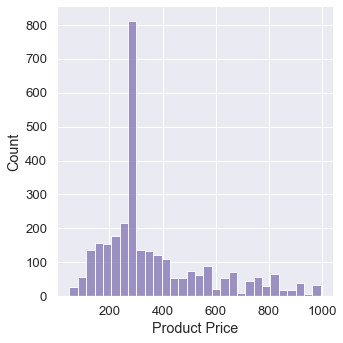

In [52]:
sns.displot(all_data['Product Price'], kde=False, bins=30, color='m')

<b> most famous 200 to 400 <b>

<AxesSubplot:xlabel='Product Price', ylabel='Density'>

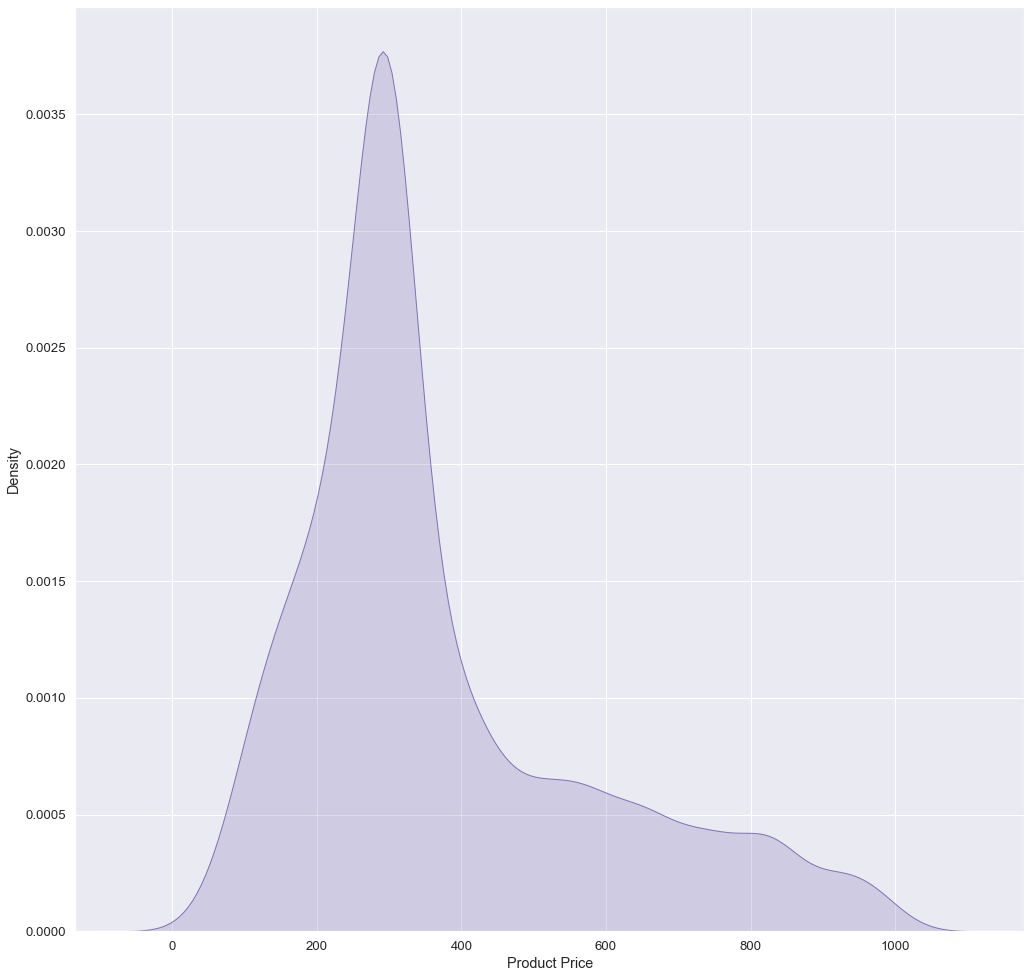

In [53]:
sns.kdeplot(all_data['Product Price'], shade=True, color='m')

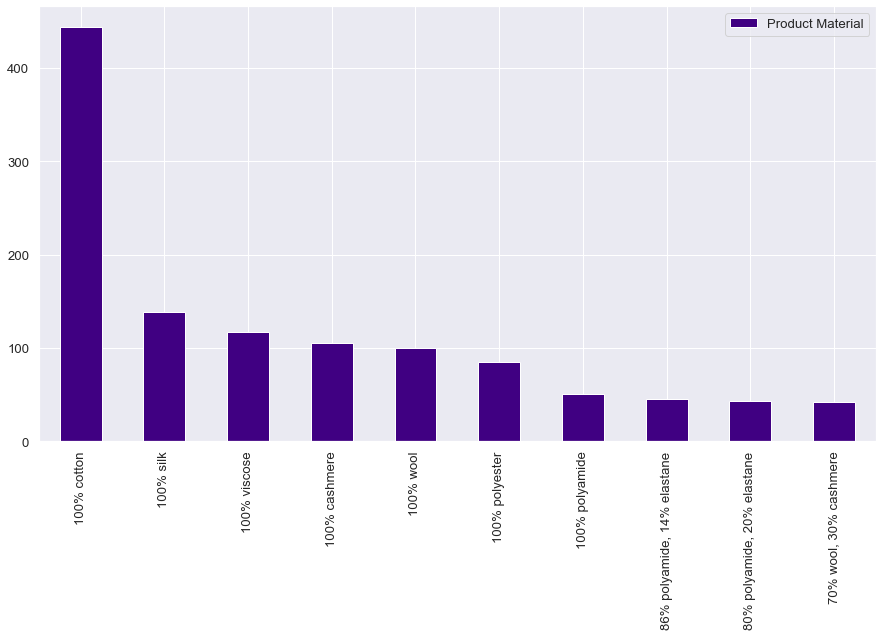

In [54]:
plt.figure(figsize = (15,8))
data['Product Material'].value_counts().head(10).plot(kind='bar' , color = '#400082')
plt.legend()

<AxesSubplot:>

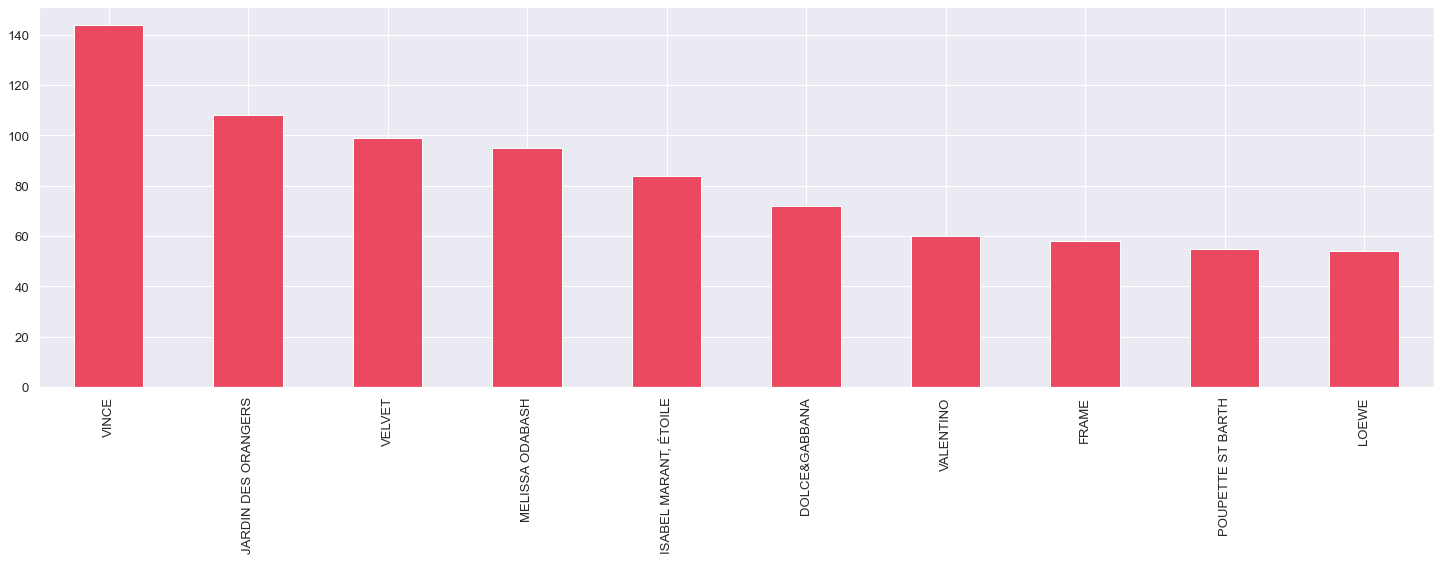

In [55]:
plt.figure(figsize=(25,7))
all_data['Product Designer'].value_counts().head(10).plot(kind='bar' , color = '#EA4961')

<AxesSubplot:>

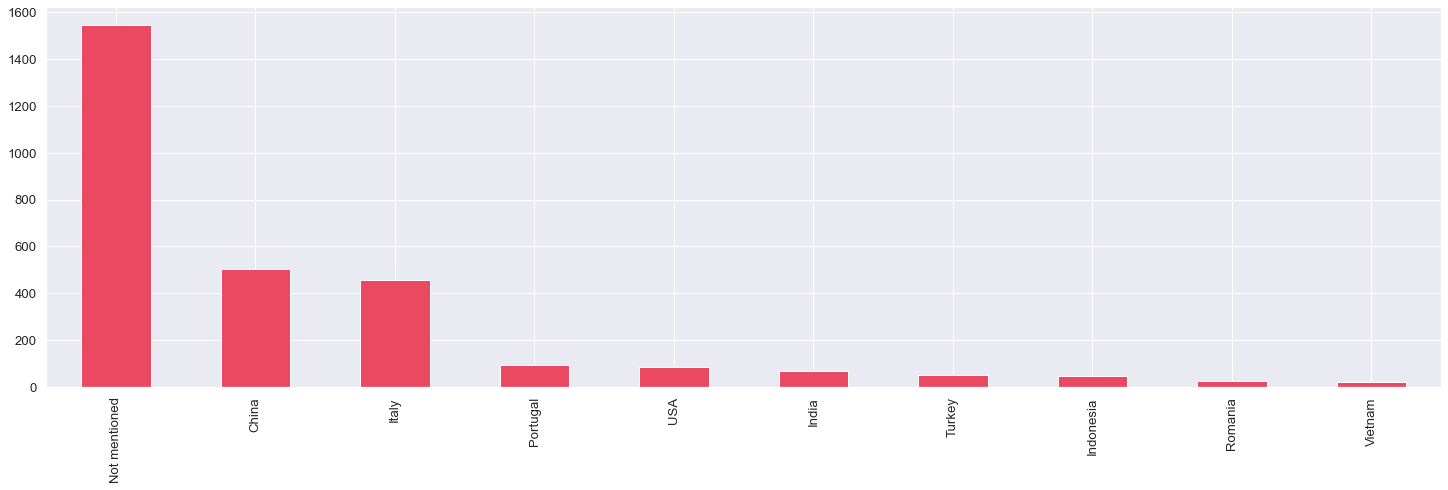

In [56]:
plt.figure(figsize=(25,7))
all_data['Product Manufacturing Country'].value_counts().head(10).plot(kind='bar' , color = '#EA4961')

<AxesSubplot:xlabel='Product Manufacturing Country', ylabel='count'>

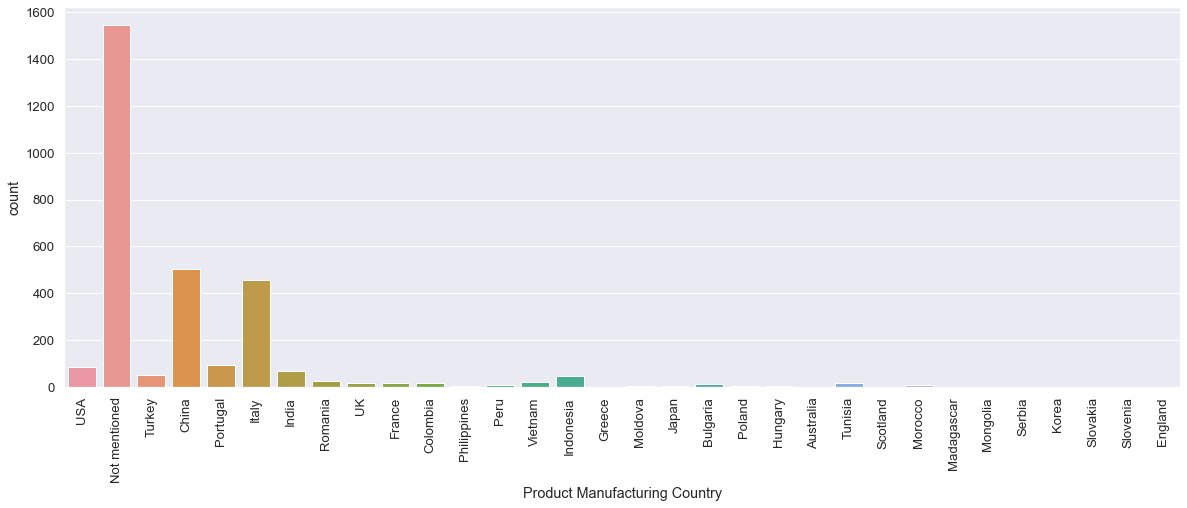

In [57]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
sns.countplot(x=all_data['Product Manufacturing Country'])

<AxesSubplot:>

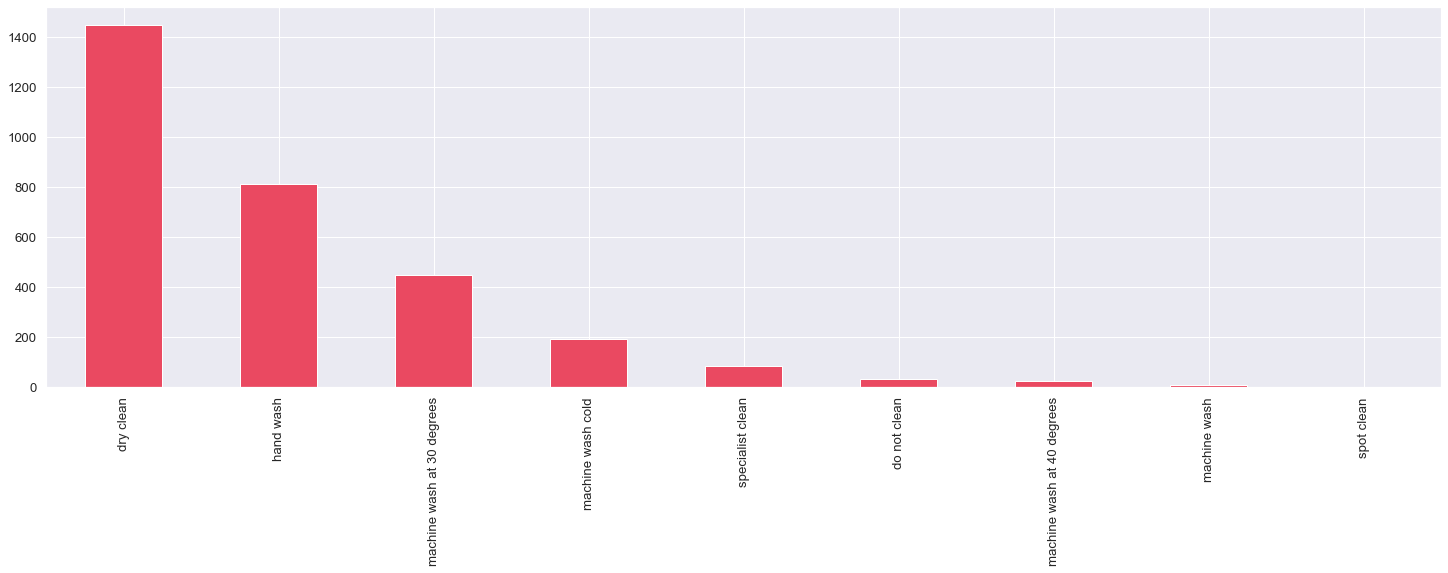

In [58]:
plt.figure(figsize=(25,7))
all_data['Product Care Instructions'].value_counts().head(10).plot(kind='bar' , color = '#EA4961')

<AxesSubplot:>

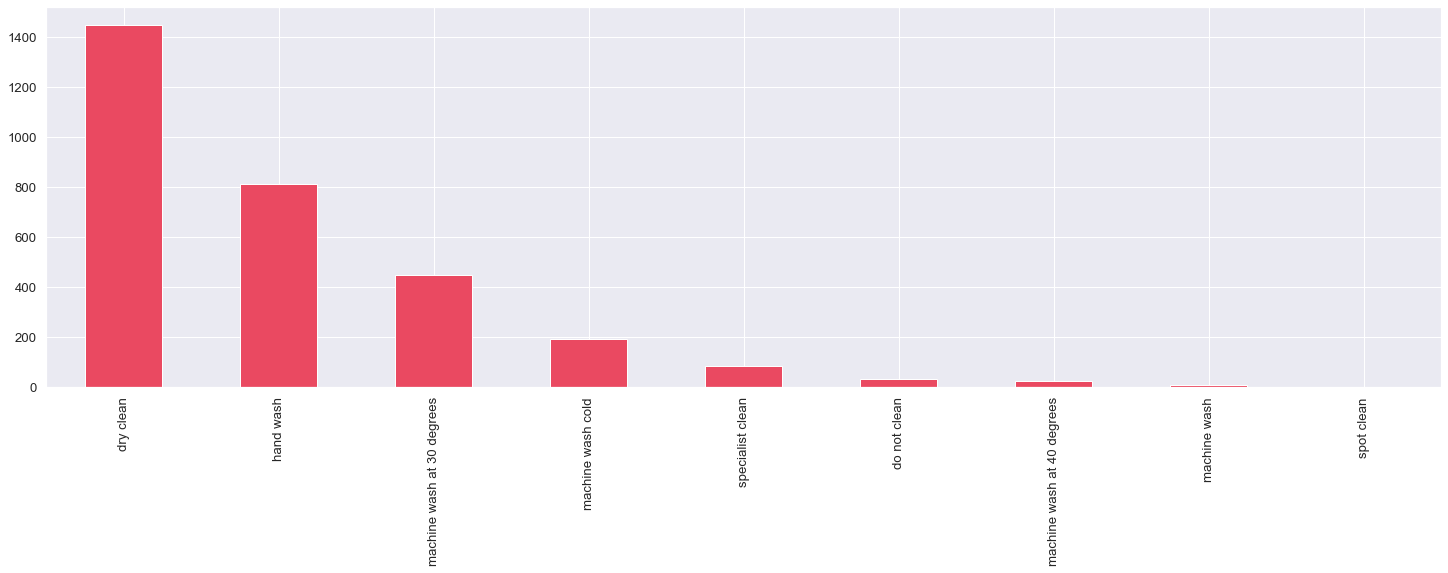

In [59]:
plt.figure(figsize=(25,7))
all_data['Product Care Instructions'].value_counts().head(10).plot(kind='bar' , color = '#EA4961')

<AxesSubplot:xlabel='count', ylabel='Product Care Instructions'>

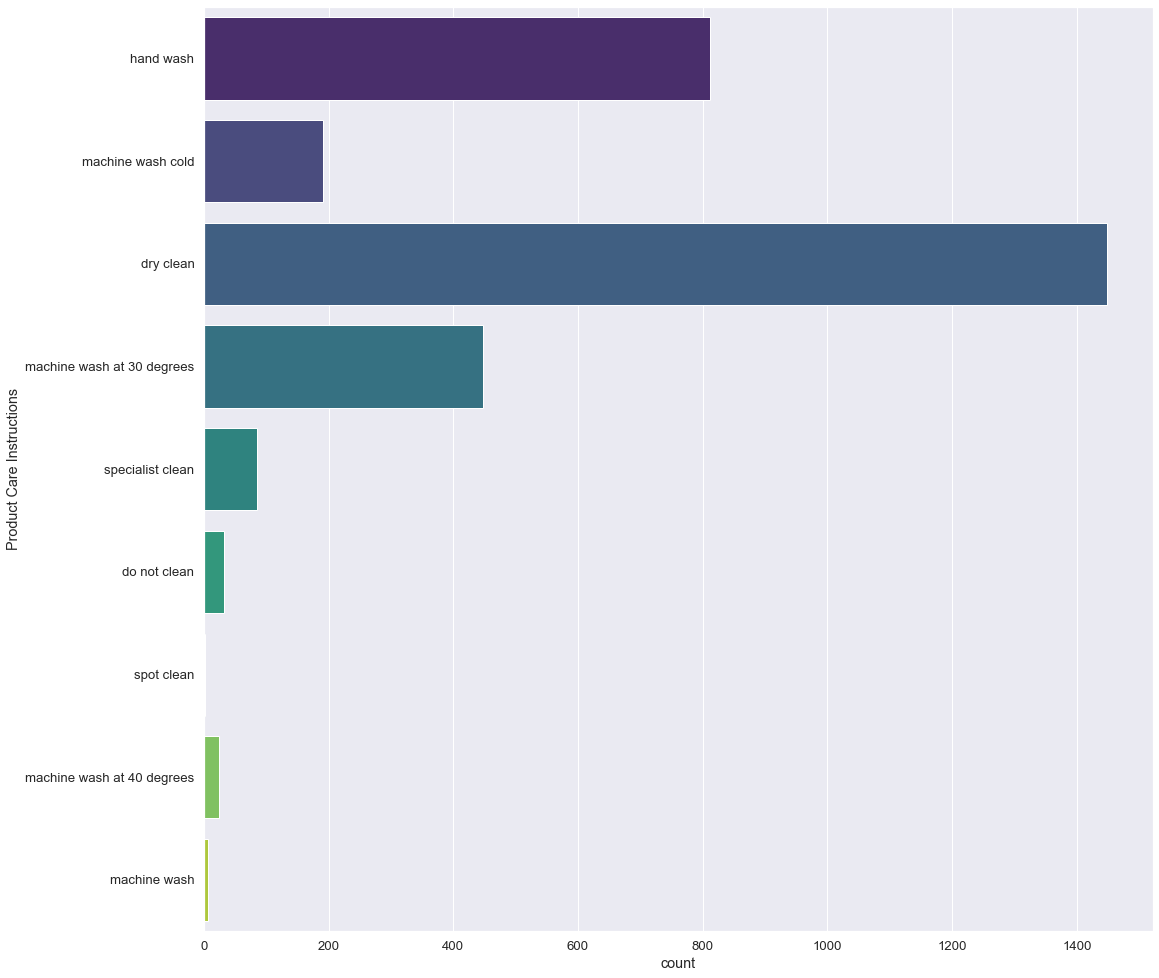

In [60]:
sns.countplot(y='Product Care Instructions', data=all_data, palette='viridis')

<AxesSubplot:xlabel='count', ylabel='Product Manufacturing Country'>

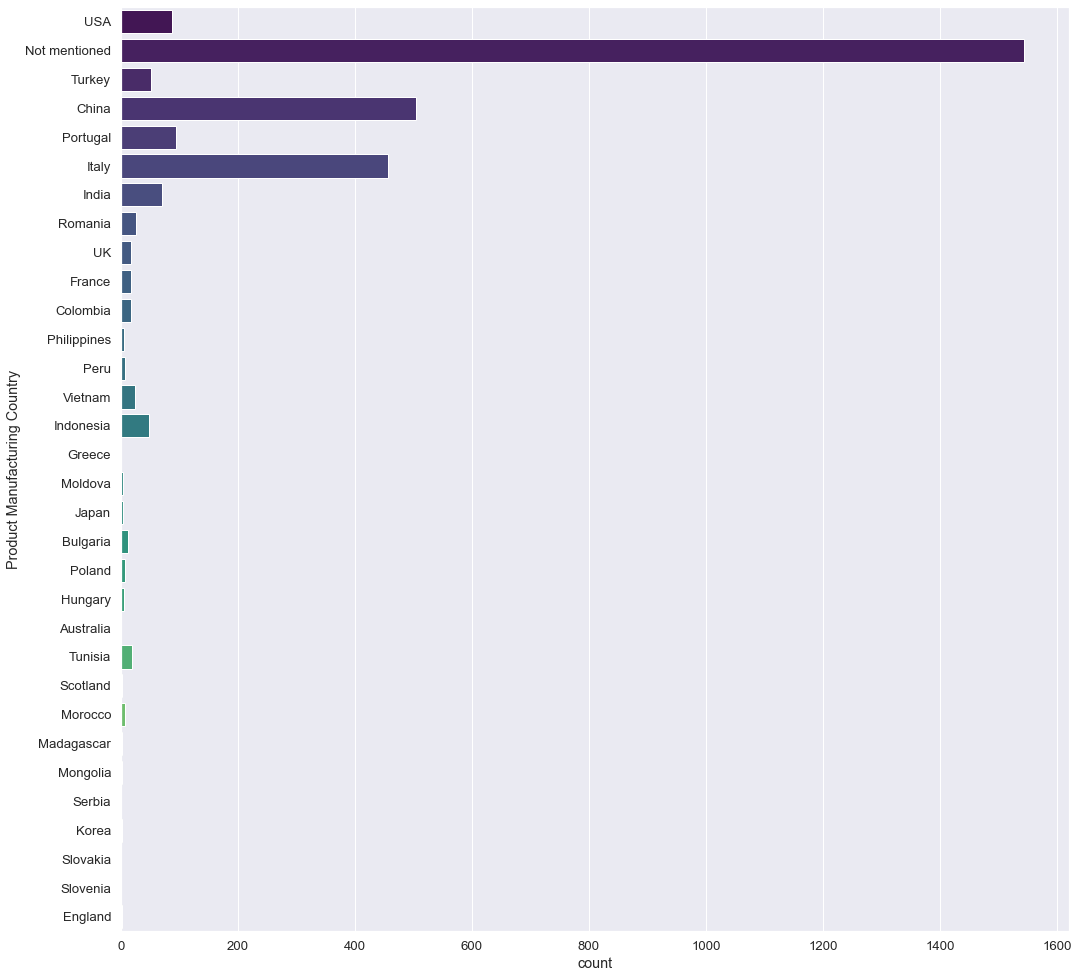

In [61]:
sns.countplot(y='Product Manufacturing Country', data=all_data, palette='viridis')

<AxesSubplot:xlabel='Product Colour', ylabel='count'>

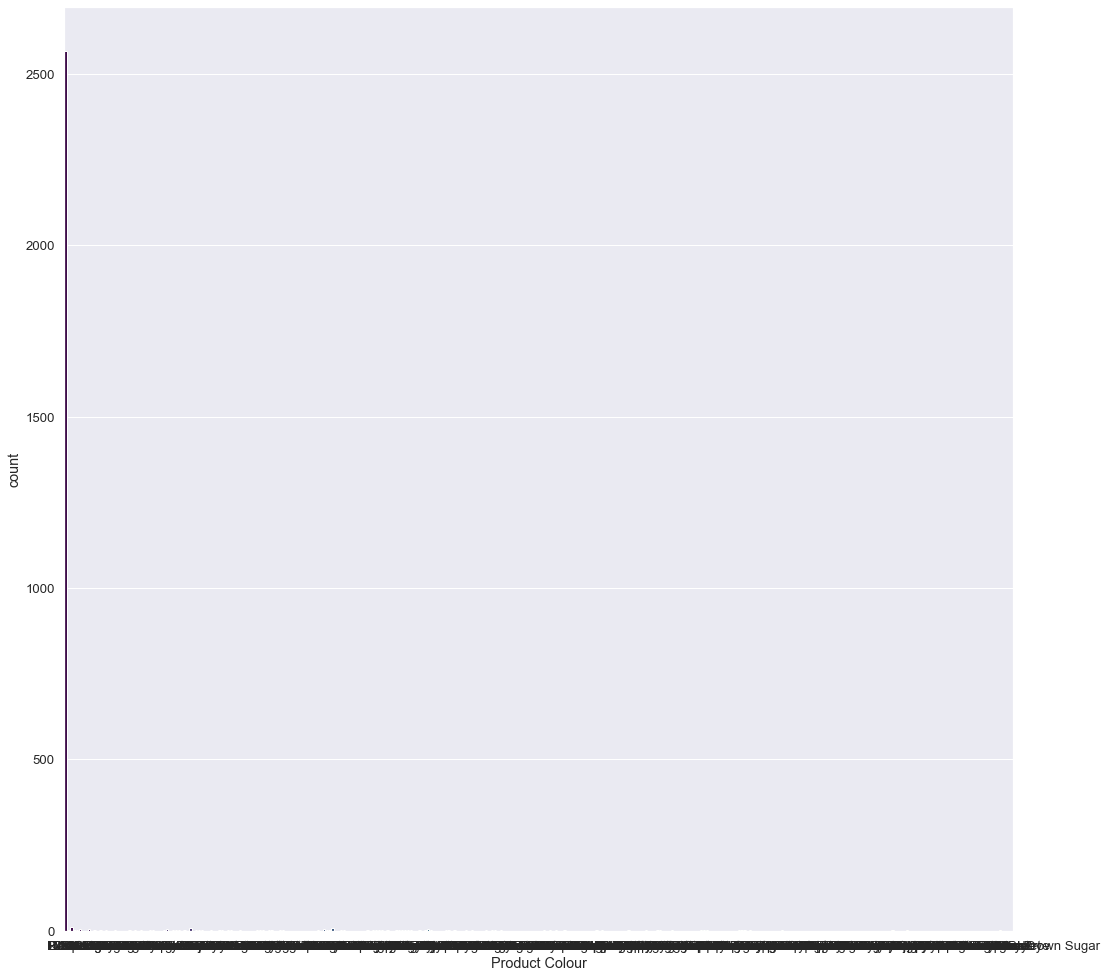

In [62]:
sns.countplot(x='Product Colour', data=all_data, palette='viridis')

In [63]:
all_data

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,VINCE,Dora linen minidress,235.0,P00697841,10% off over €600,100% linen,No lining,hand wash,USA,Black
1,VINCE,High-rise cropped cotton-blend pants,295.0,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",No lining,hand wash,Not mentioned,Black
2,FRAME,Le High cropped straight jeans,199.0,P00683891,10% off over €600,100% cotton,No lining,machine wash cold,Turkey,Black
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,339.0,P00718713,No discount,"70% virgin wool, 30% cashmere",No lining,hand wash,China,225-41
4,SAINT LAURENT,Embellished satin gown,295.0,P00728419,No discount,"100% viscose, material II",No lining,dry clean,Not mentioned,Black
...,...,...,...,...,...,...,...,...,...,...
3045,LORO PIANA,Loran corduroy shirt jacket,295.0,P00703567,No discount,100% cotton,"100% cashmere, fully lined",dry clean,Not mentioned,Black
3046,ALEX PERRY,Wilde satin crêpe midi dress,295.0,P00704311,No discount,"82% triacetate, 18% polyester",No lining,dry clean,China,Black
3047,JW ANDERSON,Logo intarsia wool hoodie,635.0,P00701605,No discount,100% wool,No lining,dry clean,China,Black
3048,AG JEANS,Girlfriend mid-rise cropped jeans,195.0,P00683515,10% off over €600,"99% organic cotton, 1% elastane",No lining,machine wash at 30 degrees,Not mentioned,Black


<AxesSubplot:xlabel='Product Designer', ylabel='count'>

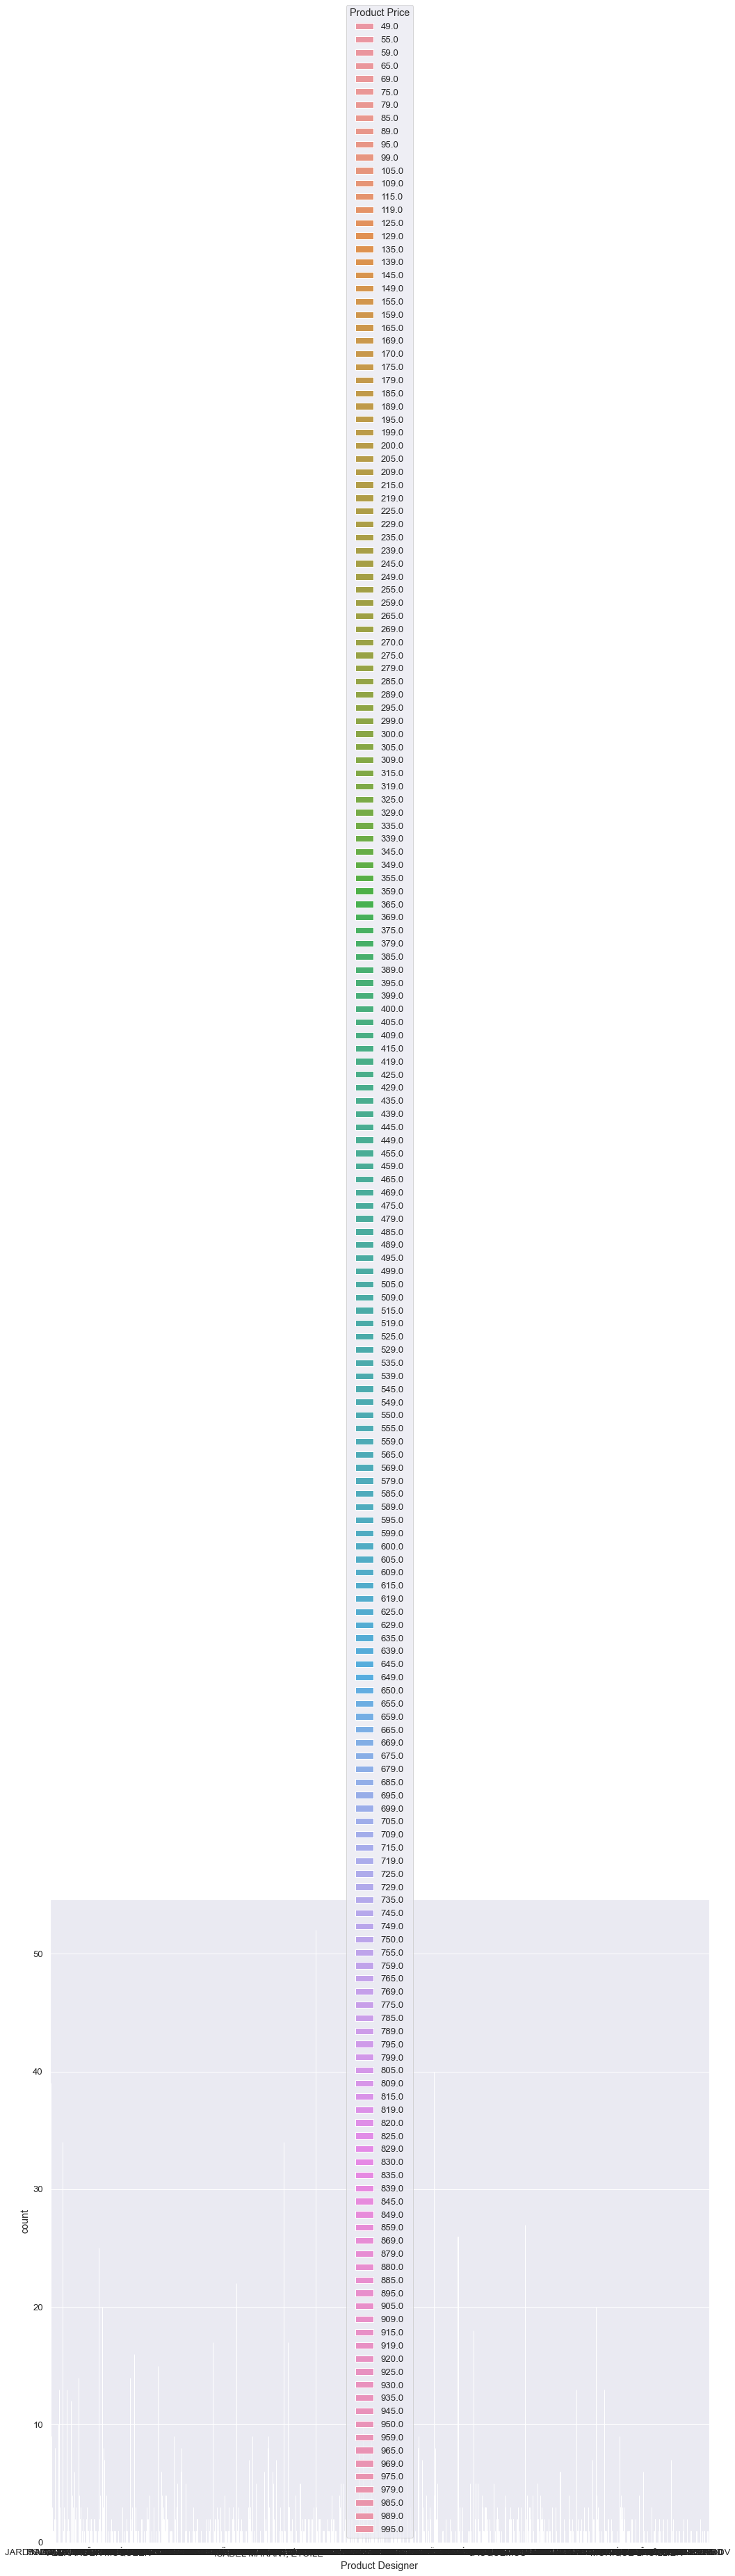

In [64]:
sns.countplot(x='Product Designer', data=all_data, hue='Product Price')

<AxesSubplot:xlabel='Product Material', ylabel='Product Price'>

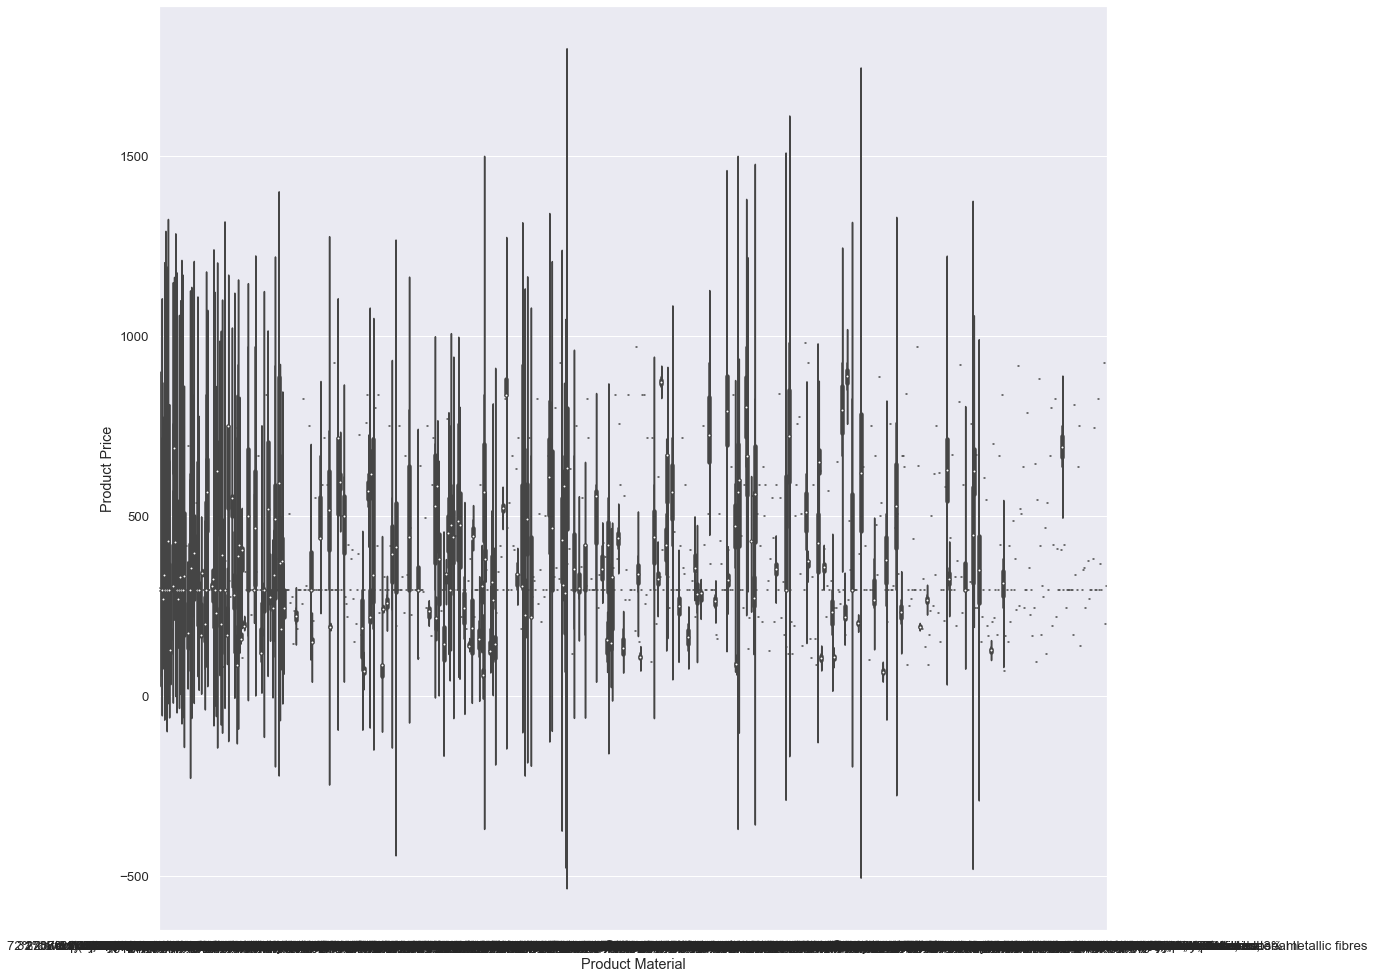

In [65]:
sns.violinplot(x='Product Material', y='Product Price', data=all_data)

In [66]:
all_data_corr = all_data.corr()
all_data_corr

,Product Price
Product Price,1.0


<AxesSubplot:>

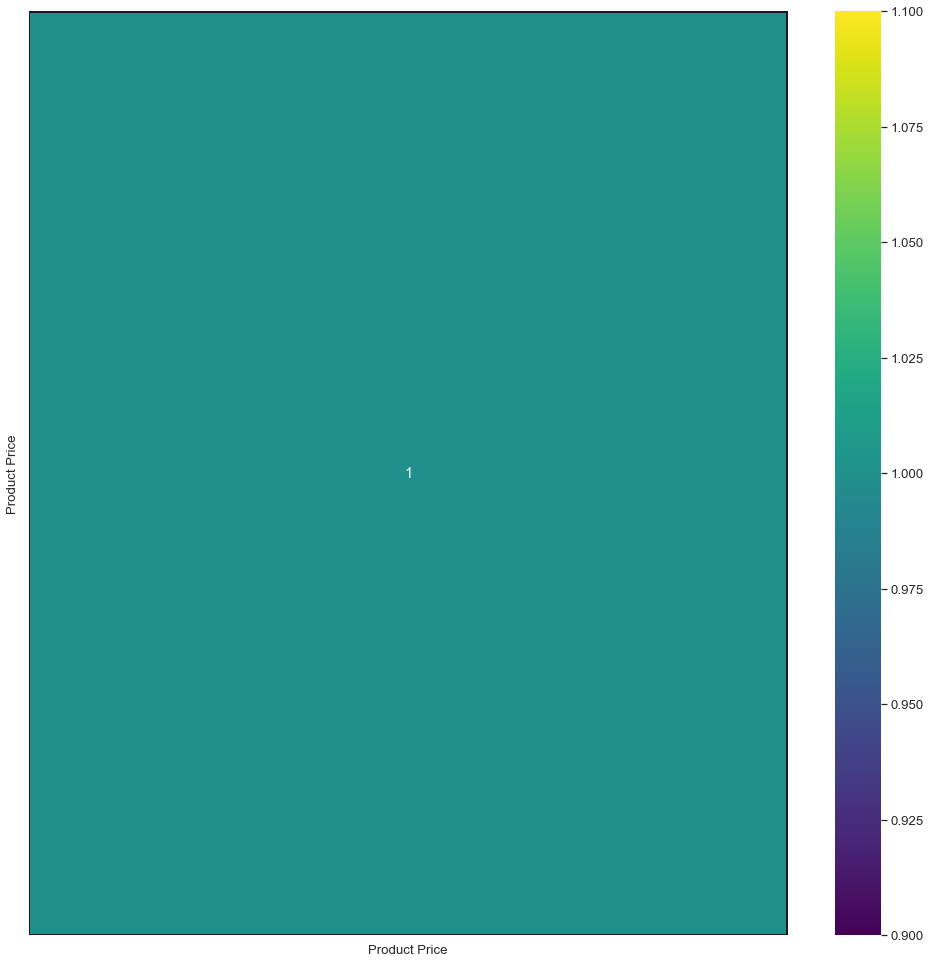

In [67]:
sns.heatmap(all_data_corr, cmap='viridis', linecolor='k', linewidths=2, annot=True, fmt='0.0f')

In [68]:
all_data.to_csv('Colthing_all_data.csv')

In [69]:
df=pd.read_csv('Colthing_all_data.csv')
df

,Unnamed: 0,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,0,VINCE,Dora linen minidress,235.0,P00697841,10% off over €600,100% linen,No lining,hand wash,USA,Black
1,1,VINCE,High-rise cropped cotton-blend pants,295.0,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",No lining,hand wash,Not mentioned,Black
2,2,FRAME,Le High cropped straight jeans,199.0,P00683891,10% off over €600,100% cotton,No lining,machine wash cold,Turkey,Black
3,3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,339.0,P00718713,No discount,"70% virgin wool, 30% cashmere",No lining,hand wash,China,225-41
4,4,SAINT LAURENT,Embellished satin gown,295.0,P00728419,No discount,"100% viscose, material II",No lining,dry clean,Not mentioned,Black
...,...,...,...,...,...,...,...,...,...,...,...
3045,3045,LORO PIANA,Loran corduroy shirt jacket,295.0,P00703567,No discount,100% cotton,"100% cashmere, fully lined",dry clean,Not mentioned,Black
3046,3046,ALEX PERRY,Wilde satin crêpe midi dress,295.0,P00704311,No discount,"82% triacetate, 18% polyester",No lining,dry clean,China,Black
3047,3047,JW ANDERSON,Logo intarsia wool hoodie,635.0,P00701605,No discount,100% wool,No lining,dry clean,China,Black
3048,3048,AG JEANS,Girlfriend mid-rise cropped jeans,195.0,P00683515,10% off over €600,"99% organic cotton, 1% elastane",No lining,machine wash at 30 degrees,Not mentioned,Black


In [70]:
all_data= pd.concat([df1.iloc[:, :-1], data], axis= 1)
all_data
all_data.drop('Product Features', axis= 1, inplace= True)
all_data

,Product Designer,Product Name,Product Price,Product No,Product Discount,Product Material,Product Lining,Product Care Instructions,Product Manufacturing Country,Product Colour
0,NaN,Dora linen minidress,€ 235,P00697841,10% off over €600,100% linen,NaN,hand wash,USA,NaN
1,VINCE,High-rise cropped cotton-blend pants,€ 295,P00727516,10% off over €600,"66% cotton, 31% viscose, 3% elastane",NaN,hand wash,NaN,NaN
2,FRAME,Le High cropped straight jeans,€ 199,P00683891,10% off over €600,NaN,NaN,machine wash cold,Turkey,NaN
3,JARDIN DES ORANGERS,Wool and cashmere sweater midi dress,€ 339,P00718713,NaN,"70% virgin wool, 30% cashmere",NaN,hand wash,China,225-41
4,SAINT LAURENT,Embellished satin gown,"€ 2,935",P00728419,NaN,"100% viscose, material II",NaN,dry clean,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3045,LORO PIANA,Loran corduroy shirt jacket,"€ 2,439",P00703567,NaN,100% cotton,"100% cashmere, fully lined",NaN,NaN,NaN
3046,ALEX PERRY,Wilde satin crêpe midi dress,"€ 1,429",P00704311,NaN,"82% triacetate, 18% polyester",NaN,dry clean,China,NaN
3047,JW ANDERSON,Logo intarsia wool hoodie,€ 635,P00701605,NaN,100% wool,NaN,dry clean,China,NaN
3048,AG JEANS,Girlfriend mid-rise cropped jeans,€ 195,P00683515,10% off over €600,"99% organic cotton, 1% elastane",NaN,machine wash at 30 degrees,NaN,NaN



## `Cleaning`

In [71]:
def fixed_price1(z):
    try:
        return float(z.split(' ')[1])
    except:
         return np.nan
all_data['Product Price']=all_data['Product Price'].apply(fixed_price)   

In [73]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3050 entries, 0 to 3049
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Product Designer               3028 non-null   object 
 1   Product Name                   3034 non-null   object 
 2   Product Price                  2375 non-null   float64
 3   Product No                     3034 non-null   object 
 4   Product Discount               0 non-null      float64
 5   Product Material               2912 non-null   object 
 6   Product Lining                 916 non-null    object 
 7   Product Care Instructions      2696 non-null   object 
 8   Product Manufacturing Country  1506 non-null   object 
 9   Product Colour                 563 non-null    object 
dtypes: float64(2), object(8)
memory usage: 238.4+ KB


In [74]:
all_data.isnull().sum() * 100 / 3050

Product Designer                   0.721311
Product Name                       0.524590
Product Price                     22.131148
Product No                         0.524590
Product Discount                 100.000000
Product Material                   4.524590
Product Lining                    69.967213
Product Care Instructions         11.606557
Product Manufacturing Country     50.622951
Product Colour                    81.540984
dtype: float64

In [ ]:
a


## `Database`

In [75]:
all_data.columns

Index(['Product Designer', 'Product Name', 'Product Price', 'Product No',
       'Product Discount', 'Product Material', 'Product Lining',
       'Product Care Instructions', 'Product Manufacturing Country',
       'Product Colour'],
      dtype='object')

In [76]:
import sqlite3
connection=sqlite3.connect('clothing.db')
c=connection.cursor()

c.execute('CREATE TABLE IF NOT EXISTS clothing(Product Designer text, Product Name text, Product Price number, Product No text,Product Discount text,Product Material text,Product Lining textProduct Care Instructions text, Product Manufacturing Country text,Product Colour text)') 

connection.commit()          

In [77]:
all_data.to_sql('clothing', connection, index=False, if_exists='replace')

C:\Users\ELPOP\anaconda3\lib\site-packages\pandas\core\generic.py:2779: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


## `Machine learning`

In [78]:

df = pd.get_dummies(df, columns=['Product Designer','Product Name','Product No','Product Discount','Product Material','Product Lining','Product Care Instructions','Product Manufacturing Country','Product Colour']
       , drop_first=True)
df


,Unnamed: 0,Product Price,Product Designer_3X1 N.Y.C.,Product Designer_7 FOR ALL MANKIND,Product Designer_A.P.C.,Product Designer_ACNE STUDIOS,Product Designer_AG JEANS,Product Designer_AGOLDE,Product Designer_AGUA BY AGUA BENDITA,Product Designer_ALANUI,...,Product Colour_White Powder,Product Colour_White Sand,Product Colour_White khaki,Product Colour_White/Multicolor,Product Colour_Winsome Orchid,Product Colour_Wisteria,Product Colour_Yellow,Product Colour_Yellow Ditsy Floral,Product Colour_Zebra Sepia,Product Colour_Zinnia
0,0,235.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,295.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,199.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,339.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,295.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3045,3045,295.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3046,3046,295.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3047,3047,635.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3048,3048,195.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
from sklearn.model_selection import train_test_split
x= df.drop('Product Price', axis=1)
y = df['Product Price']

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LinearRegression 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = [
     LinearRegression(),
     KNeighborsRegressor(),
     DecisionTreeRegressor(),
     SVR(),
     RandomForestRegressor(), 
     XGBRegressor()
]

for model in models:  
     print(model)
     model.fit(x_train, y_train)
     y_pred = model.predict(x_test)
     print(f'R2: {r2_score(y_test, y_pred) * 100}')
     print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
     print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}\n---------')